## Code to Process and Analyze Data

Columns in DataFrame: Index(['municipality_concept_id', 'municipality', 'region_concept_id',
       'region', 'country_concept_id', 'country', 'id', 'headline', 'brief',
       'occupation_group.label', 'occupation_field.label', 'employer.name',
       'publication_date'],
      dtype='object')

Job Count by Region:
region
Skåne län            1
Stockholms län       6
Västerbottens län    1
Östergötlands län    2
Name: headline, dtype: int64


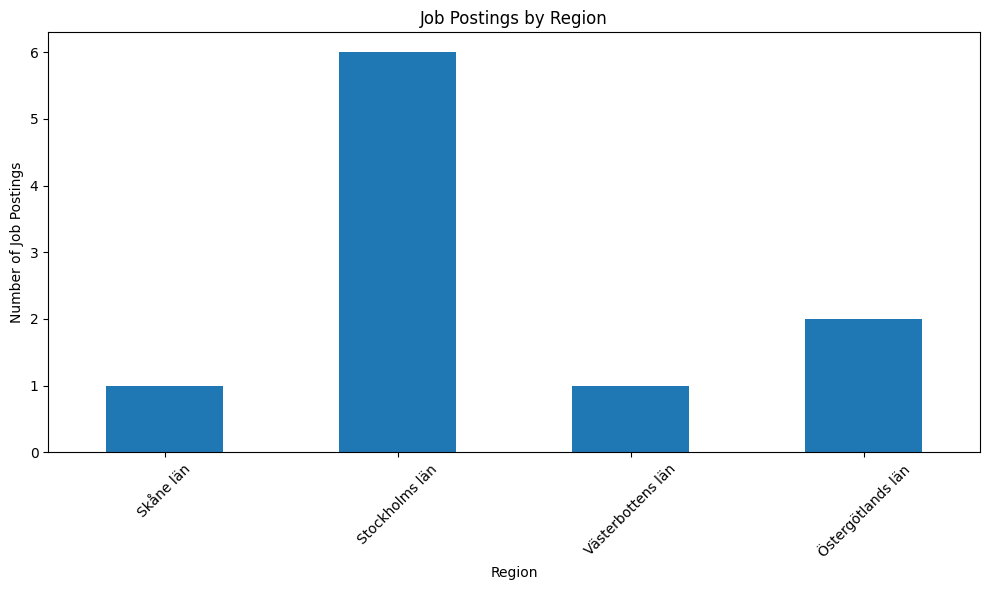

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

file_path = r"Field_Search_python.json"

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
except FileNotFoundError:
    print("File not found. Ensure the file path is correct.")
    raise

hits = data.get("hits", [])

df = pd.json_normalize(
    hits,
    record_path=["workplace_addresses"],  # Flatten the workplace_addresses list
    meta=[
        "id",
        "headline",
        "brief",
        "occupation_group.label",
        "occupation_field.label",
        "employer.name",
        "publication_date",
    ],
    sep="_",  # Use underscore to flatten nested keys
    errors="ignore"
)

print("Columns in DataFrame:", df.columns)

if "region" in df.columns:
    df["region"] = df["region"].fillna("Unknown")  # Fill missing regions with 'Unknown'
else:
    print("'region' column is missing from the DataFrame. Check the JSON structure.")
    df["region"] = "Unknown"

job_count_by_region = df.groupby("region")["headline"].count()

print("\nJob Count by Region:")
print(job_count_by_region)

job_count_by_region.plot(kind="bar", figsize=(10, 6))
plt.title("Job Postings by Region")
plt.xlabel("Region")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 1. Advanced Data Analysis

### Top Employers by Region: Identify which employers have the most job postings in each region:

In [2]:
top_employers = df.groupby(["region", "employer.name"])["headline"].count().sort_values(ascending=False)
print(top_employers)


Series([], Name: headline, dtype: int64)


### Most Popular Occupation Fields: Analyze which occupation fields are most in demand:

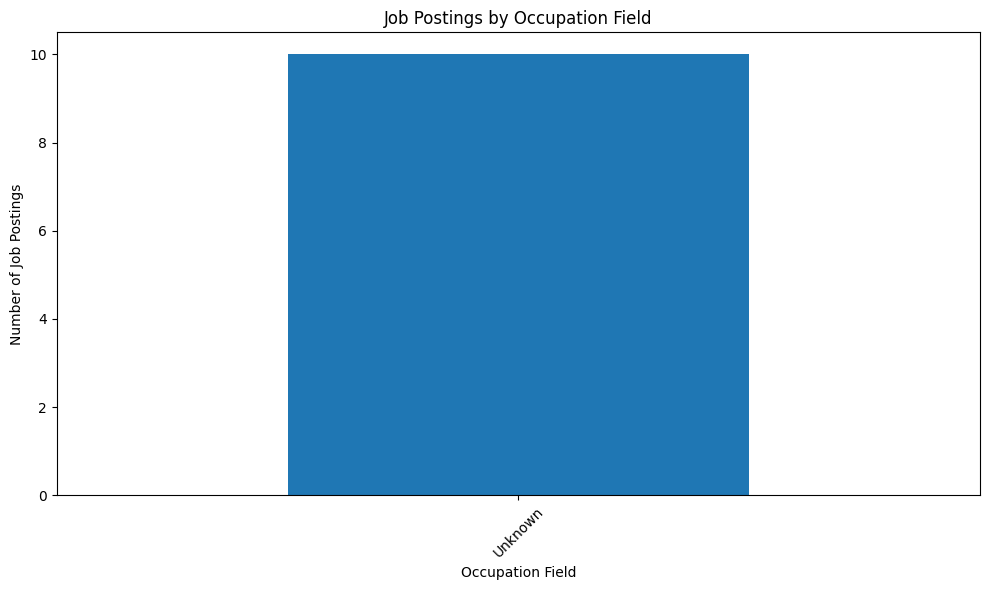

In [3]:
if "occupation_field.label" in df.columns:
    df["occupation_field.label"] = df["occupation_field.label"].fillna("Unknown")

    popular_fields = df["occupation_field.label"].value_counts()

    if not popular_fields.empty:
        popular_fields.plot(kind="bar", figsize=(10, 6))
        plt.title("Job Postings by Occupation Field")
        plt.xlabel("Occupation Field")
        plt.ylabel("Number of Job Postings")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No data available in 'occupation_field.label' to plot.")
else:
    print("Column 'occupation_field.label' does not exist in the DataFrame.")


## Top Employers by Region: Identify which employers have the most job postings in each region:

occupation_field.label
Unknown    10
Name: count, dtype: int64


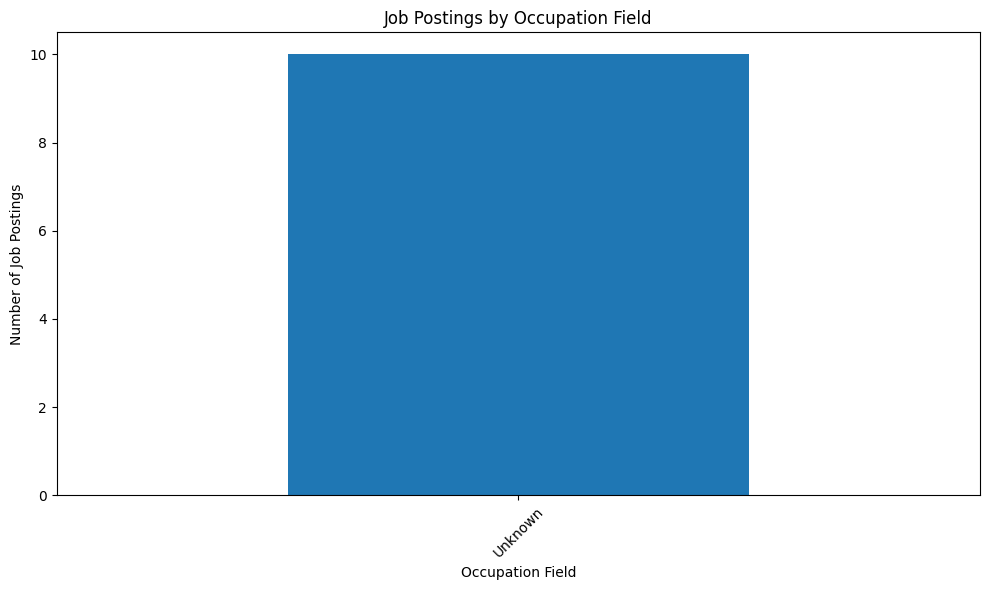

In [4]:
popular_fields = df["occupation_field.label"].value_counts()
print(popular_fields)

# Plot the results
popular_fields.plot(kind="bar", figsize=(10, 6))
plt.title("Job Postings by Occupation Field")
plt.xlabel("Occupation Field")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Publication Trends: Analyze when most job postings are published:

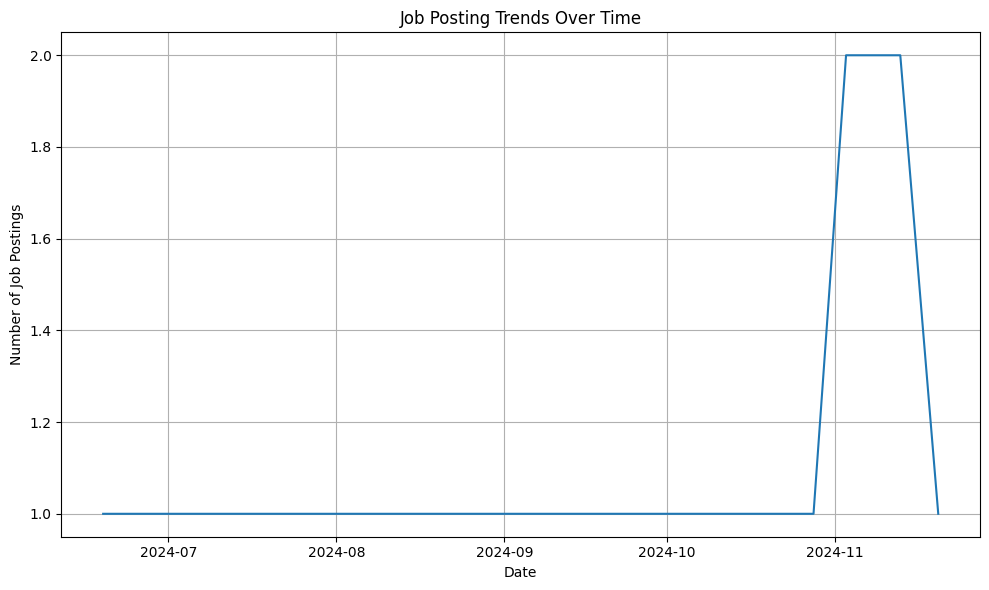

In [4]:
df["publication_date"] = pd.to_datetime(df["publication_date"])  # Convert to datetime
publication_trends = df["publication_date"].dt.date.value_counts().sort_index()

# Plot the trends
publication_trends.plot(kind="line", figsize=(10, 6))
plt.title("Job Posting Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Job Postings")
plt.grid()
plt.tight_layout()
plt.show()


## 2. Clean and Export Data

### Save as CSV:

In [5]:
df.to_csv(r"cleaned_job_data.csv", index=False)

## Insights and Reporting

### Generate Summary Tables:

In [6]:
summary_table = df.groupby("region")["headline"].count().reset_index()
summary_table.columns = ["Region", "Number of Job Postings"]
print(summary_table)

              Region  Number of Job Postings
0          Skåne län                       1
1     Stockholms län                       6
2  Västerbottens län                       1
3  Östergötlands län                       2


## Compare Regions

### Bar Chart of Top Regions:

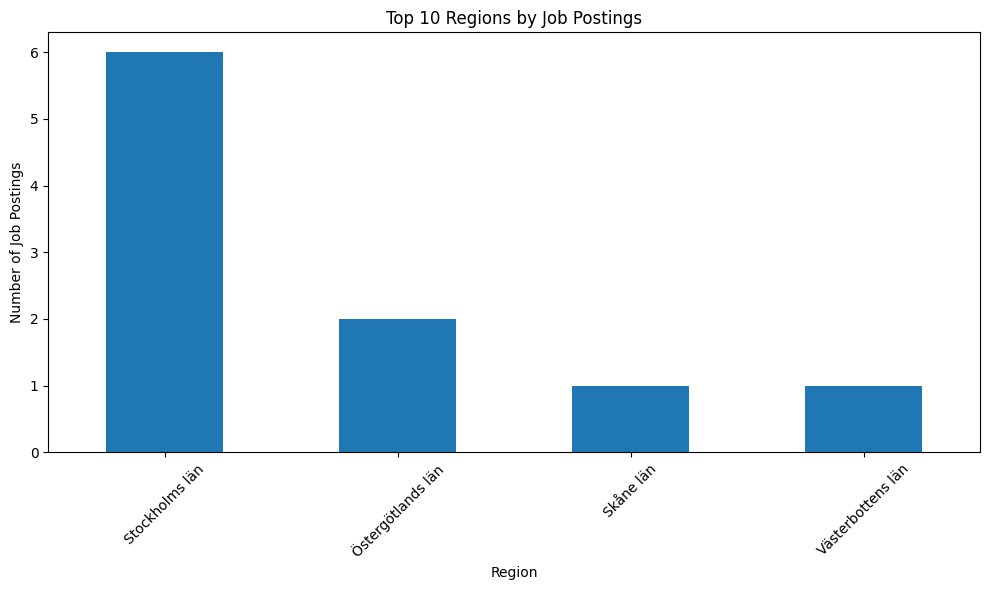

In [7]:
top_regions = job_count_by_region.sort_values(ascending=False).head(10)
top_regions.plot(kind="bar", figsize=(10, 6))
plt.title("Top 10 Regions by Job Postings")
plt.xlabel("Region")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Customize Visualizations


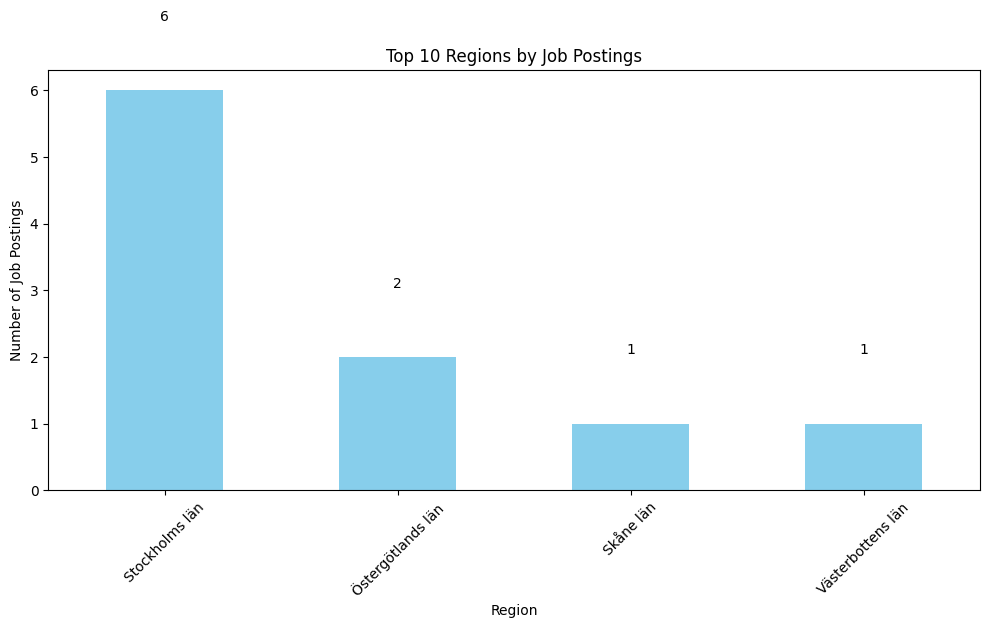

In [8]:
import numpy as np
top_regions = job_count_by_region.sort_values(ascending=False).head(10)
ax = top_regions.plot(kind="bar", figsize=(10, 6), color="skyblue")
plt.title("Top 10 Regions by Job Postings")
plt.xlabel("Region")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.tight_layout()

for i, v in enumerate(top_regions):
    plt.text(i, v + 1, str(v), ha="center", va="bottom")

plt.show()
